In [1]:
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import time
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arnab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
rev_all = pd.read_csv('imdb_master.csv',encoding="ISO-8859-1",index_col=None)
del rev_all['Unnamed: 0']
rev_all.head(10)

,type,review,label,file
0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
5,test,"A funny thing happened to me while watching ""M...",neg,10004_2.txt
6,test,This German horror film has to be one of the w...,neg,10005_2.txt
7,test,"Being a long-time fan of Japanese film, I expe...",neg,10006_2.txt
8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,10007_4.txt
9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg,10008_4.txt


In [3]:
rev_all.shape

(100000, 4)

In [4]:
rev_all['review'][0]

"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in."

In [5]:
rev_all['review'][1]

"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to s

In [6]:
rev_all['review'][2]

"First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like clichÃ©'e version of gangsters.<br /><br />The movie doesn't take more than five minutes to explain what is going on before we're already at the warehouse There is not a single sympathetic character in this movie, except for the homeless guy, who is also the only one with half a brain.<br /><br />Bill Paxton and William Sadler are both hill billies and Sadlers character is just as much a villain as the gangsters. I did'nt like him right from the start.<br /><br />The movie is filled with pointless violence and Walter Hills specialty: people falling through windows with glass flying everywhere. There is pretty much no plot and it is a big problem when you root for no-one. Everybody dies, except from Paxton and the homeless guy and everybody get what they deserve.<br /><br />The only two black people that can act is the 

In [7]:
rev_all['label'].value_counts()

unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

In [8]:
rev_all_unsup = rev_all[rev_all['label'] == 'unsup']

In [9]:
rev_all = rev_all[~(rev_all['label'] == 'unsup')]

### Text cleaning

In [10]:
rev_all.review = rev_all.review.str.lower()
rev_all.review = rev_all.review.str.replace(r'<br />',' ')
rev_all = rev_all[~rev_all.review.str.match(r'^\s*$')]
rev_all.review = rev_all.review.str.replace('[^a-zA-Z]',' ')
rev_all.review = rev_all.review.str.replace(r'\n',' ')
rev_all.review = rev_all.review.str.replace(r'\s+',' ')

In [11]:
filtered_reviews = []
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

for review in rev_all.review:

     filtered_reviews.append([ps.stem(w.lower()) for w in word_tokenize(review)])

In [12]:
corpus = [' '.join(x) for x in filtered_reviews]

In [13]:
corpus

['onc again mr costner ha drag out a movi for far longer than necessari asid from the terrif sea rescu sequenc of which there are veri few i just did not care about ani of the charact most of us have ghost in the closet and costner s charact are realiz earli on and then forgotten until much later by which time i did not care the charact we should realli care about is a veri cocki overconfid ashton kutcher the problem is he come off as kid who think he s better than anyon els around him and show no sign of a clutter closet hi onli obstacl appear to be win over costner final when we are well past the half way point of thi stinker costner tell us all about kutcher s ghost we are told whi kutcher is driven to be the best with no prior inkl or foreshadow no magic here it wa all i could do to keep from turn it off an hour in',
 'thi is an exampl of whi the major of action film are the same gener and bore there s realli noth worth watch here a complet wast of the then bare tap talent of ice t

In [14]:
vect = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=1500).fit(corpus)

In [15]:
print(vect.get_feature_names())

['abil', 'abl', 'abov', 'absolut', 'absurd', 'abus', 'accent', 'accept', 'accid', 'accur', 'achiev', 'act', 'act wa', 'action', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addit', 'admir', 'admit', 'adult', 'adventur', 'affair', 'affect', 'age', 'agent', 'ago', 'agre', 'ahead', 'air', 'alien', 'aliv', 'allow', 'alon', 'alreadi', 'alway', 'amaz', 'america', 'american', 'amus', 'angel', 'angl', 'ani', 'anim', 'ann', 'annoy', 'anoth', 'answer', 'anti', 'anymor', 'anyon', 'anyth', 'apart', 'appar', 'appeal', 'appear', 'appreci', 'approach', 'area', 'aren', 'arm', 'armi', 'arriv', 'art', 'artist', 'asid', 'ask', 'aspect', 'assum', 'atmospher', 'attack', 'attempt', 'attent', 'attitud', 'attract', 'audienc', 'author', 'avail', 'averag', 'avoid', 'aw', 'award', 'away', 'awesom', 'babi', 'background', 'bad', 'bad act', 'bad guy', 'bad movi', 'badli', 'ball', 'band', 'bar', 'bare', 'base', 'basic', 'batman', 'battl', 'bear', 'beat', 'beauti', 'becam', 'becaus', 'becaus wa', 'bec

In [16]:
X = vect.transform(corpus)
X

<50000x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 3303518 stored elements in Compressed Sparse Row format>

In [17]:
X_df = pd.DataFrame(X.toarray())

In [18]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013682,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012238,0.000000,0.000000,0.0,...,0.000000,0.012809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.014231,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.0,0.021435,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.011171,0.000000,0.000000,0.017934,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.013492,0.000000,0.000000,0.021661,0.000000,0.000000,0.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [19]:
#X_df.to_csv('X_df_new.csv',index=False)

In [20]:
#rev_all.to_csv('rev_all_new.csv',index=False)

### Train Test split

In [21]:
X_df = pd.read_csv('X_df_new.csv')
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.013682,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.012238,0.0,0.0,0.0,...,0.0,0.012809,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.014231,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [22]:
rev_all = pd.read_csv('rev_all_new.csv')
rev_all.head()

,type,review,label,file
0,test,once again mr costner has dragged out a movie ...,neg,0_2.txt
1,test,this is an example of why the majority of acti...,neg,10000_4.txt
2,test,first of all i hate those moronic rappers who ...,neg,10001_1.txt
3,test,not even the beatles could write songs everyon...,neg,10002_3.txt
4,test,brass pictures movies is not a fitting word fo...,neg,10003_3.txt


In [23]:
# idx = rev_all.sample(10000).index
# print(idx)
# rev_all.loc[idx,'label'] = 'neu'

In [24]:
rev_all['label'] = rev_all['label'].astype('category').cat.codes
rev_all.head()

,type,review,label,file
0,test,once again mr costner has dragged out a movie ...,0,0_2.txt
1,test,this is an example of why the majority of acti...,0,10000_4.txt
2,test,first of all i hate those moronic rappers who ...,0,10001_1.txt
3,test,not even the beatles could write songs everyon...,0,10002_3.txt
4,test,brass pictures movies is not a fitting word fo...,0,10003_3.txt


In [25]:
rev_all['label'].value_counts()

1    25000
0    25000
Name: label, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_df, 
                                                    rev_all['label'], 
                                                    random_state=7, test_size=0.25)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37500, 1500) (12500, 1500) (37500,) (12500,)


In [28]:
y_train

17552    1
20467    1
49715    1
31896    0
11953    0
24089    1
19368    1
47483    1
6915     0
44664    1
26169    0
7744     0
25388    0
22398    1
2030     0
37337    0
26263    0
3413     0
14715    1
26705    0
28457    0
4340     0
36072    0
46251    1
6816     0
6753     0
5881     0
23418    1
48468    1
29342    0
        ..
31270    0
47305    1
8504     0
28962    0
44992    1
48317    1
37627    1
45239    1
33944    0
36664    0
25925    0
44735    1
27692    0
3516     0
7955     0
13387    1
23468    1
1092     0
38886    1
19623    1
45960    1
27354    0
28232    0
2583     0
34140    0
13927    1
919      0
38467    1
10742    0
49689    1
Name: label, Length: 37500, dtype: int8

### Multinomial Naive Bayes 

In [29]:
NBmodel = MultinomialNB().fit(X_train, y_train) 

In [30]:
predicted = NBmodel.predict(X_test)

In [31]:
acc_tr = accuracy_score(y_train, NBmodel.predict(X_train), normalize=True) * float(100)
print('\n-------Train accuracy is',(acc_tr))


-------Train accuracy is 84.96266666666666


In [32]:
acc_te = accuracy_score(y_test, predicted, normalize=True) * float(100)
print('\n-------Test accuracy is',(acc_te))


-------Test accuracy is 84.088


In [33]:
print(confusion_matrix(y_test, predicted))  

[[5237  909]
 [1080 5274]]


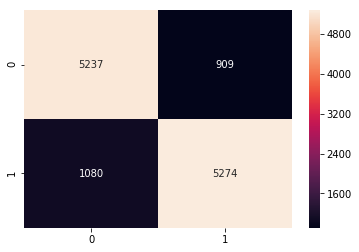

In [34]:
sns.heatmap(confusion_matrix(y_test, predicted),annot=True,fmt='d')

### Gaussian Naive Bayes

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.5027733333333333

In [37]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.49722666666666665

In [38]:
#priors=[0.503,0.497]

In [39]:
GNBmodel = GaussianNB(priors=[0.503,0.497]).fit(X_train, y_train)

In [40]:
predicted = GNBmodel.predict(X_test)

In [41]:
acc_tr = accuracy_score(y_train, GNBmodel.predict(X_train), normalize=True) * float(100)
print('\n-------Train accuracy is',(acc_tr))


-------Train accuracy is 81.528


In [42]:
acc_te = accuracy_score(y_test, predicted, normalize=True) * float(100)
print('\n-------Test accuracy is',(acc_te))


-------Test accuracy is 80.296


In [43]:
print(confusion_matrix(y_test, predicted))  

[[5078 1068]
 [1395 4959]]


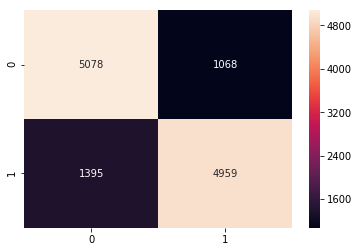

In [44]:
sns.heatmap(confusion_matrix(y_test, predicted),annot=True,fmt='d')

### Gaussian Naive Bayes  with features reduced by LDA

In [45]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\Arnab\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [46]:
y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.5027733333333333

In [47]:
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.49722666666666665

In [48]:
#priors=[0.503,0.497]

In [49]:
GNBmodel = GaussianNB(priors=[0.503,0.497]).fit(X_train, y_train)

In [50]:
predicted = GNBmodel.predict(X_test)

In [51]:
acc_tr = accuracy_score(y_train, GNBmodel.predict(X_train), normalize=True) * float(100)
print('\n-------Train accuracy is',(acc_tr))


-------Train accuracy is 88.46133333333334


In [52]:
acc_te = accuracy_score(y_test, predicted, normalize=True) * float(100)
print('\n-------Test accuracy is',(acc_te))


-------Test accuracy is 86.21600000000001


In [53]:
print(confusion_matrix(y_test, predicted))  

[[5237  909]
 [ 814 5540]]


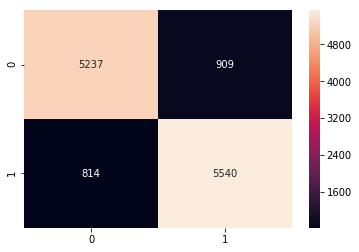

In [54]:
sns.heatmap(confusion_matrix(y_test, predicted),annot=True,fmt='d')